In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [2]:
def create_model():
    model = Sequential()
    #输入数据的shape为(n_samples, timestamps, features)
    #隐藏层设置为256, input_shape元组第二个参数1意指features为1
    #下面还有个lstm，故return_sequences设置为True
    model.add(LSTM(units=256,input_shape=(None,1),return_sequences=True))
    model.add(LSTM(units=256))
    #后接全连接层，直接输出单个值，故units为1
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    model.compile(loss='mse',optimizer='adam')
    return model

In [3]:
df = pd.read_csv('passengers.csv',usecols=['passengers'])

# 数据归一化后分成序列

In [4]:
scaler_minmax = MinMaxScaler()
data = scaler_minmax.fit_transform(df)
infer_seq_length = 10#用于推断的历史序列长度

d = []
for i in range(data.shape[0]-infer_seq_length):
    d.append(data[i:i+infer_seq_length+1].tolist())
d = np.array(d)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 划分训练集

In [5]:
split_rate = 0.9
X_train, y_train = d[:int(d.shape[0]*split_rate),:-1], d[:int(d.shape[0]*split_rate),-1]

# 创建训练模型

In [6]:
model =create_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.fit(X_train, y_train, batch_size=20,epochs=100,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 225 samples, validate on 25 samples
Epoch 1/100
225/225 [==============================] - 3s 12ms/step - loss: 0.0176 - val_loss: 0.0206
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0219
Epoch 3/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0171
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0108 - val_loss: 0.0167
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0176
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0122 - val_loss: 0.0205
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0104 - val_loss: 0.0178
Epoch 8/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0101 - val_loss: 0.0178
Epoch 9/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.01

225/225 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0177
Epoch 79/100
225/225 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0197
Epoch 80/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0193
Epoch 81/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0185
Epoch 82/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0187
Epoch 83/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0188
Epoch 84/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0190
Epoch 85/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0188
Epoch 86/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0187
Epoch 87/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 

# 预测结果

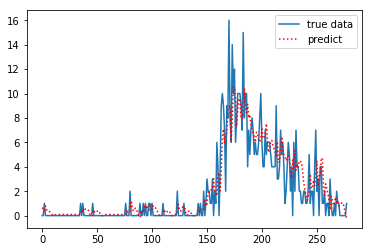

In [8]:
#inverse_transform获得归一化前的原始数据
plt.plot(scaler_minmax.inverse_transform(d[:,-1]),label='true data')
plt.plot(scaler_minmax.inverse_transform(model.predict(d[:,:-1])),'r:',label='predict')
plt.legend()

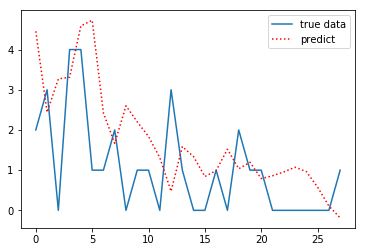

In [9]:
plt.plot()
plt.plot(scaler_minmax.inverse_transform(d[int(len(d)*split_rate):,-1]),label='true data')
plt.plot(scaler_minmax.inverse_transform(model.predict(d[int(len(d)*split_rate):,:-1])),'r:',label='predict')
plt.legend()